In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [2]:
df = pd.read_csv('/content/BUSD-USD.csv')

In [3]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,1.001907,1.007693,0.995165,1.003546,1.003546,19779988
1,2020-01-28,1.003707,1.008858,0.992948,0.999840,0.999840,25015028
2,2020-01-29,0.999605,1.006759,0.994935,1.004144,1.004144,20810480
3,2020-01-30,1.004207,1.012232,0.999152,1.002050,1.002050,20571220
4,2020-01-31,1.002327,1.006600,0.999915,1.002902,1.002902,19372175


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
716,2022-01-12,0.999593,1.001474,0.998209,0.999687,0.999687,4543435607
717,2022-01-13,0.999701,1.001527,0.998226,1.000155,1.000155,4713084695
718,2022-01-14,1.000218,1.001682,0.998064,1.000097,1.000097,4371361697
719,2022-01-15,1.000154,1.001535,0.998566,0.999082,0.999082,2928423910
720,2022-01-16,0.999100,1.001592,0.998107,0.999535,0.999535,3172063295


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,721.000000,721.000000,721.000000,721.000000,721.000000,7.210000e+02
mean,1.000309,1.004212,0.997102,1.000318,1.000318,2.995736e+09
std,0.003073,0.007685,0.006871,0.003115,0.003115,3.140416e+09
min,0.970006,0.999900,0.886124,0.970006,0.970006,1.937218e+07
25%,0.999864,1.000436,0.997125,0.999863,0.999863,1.764038e+08
50%,1.000100,1.001227,0.999249,1.000100,1.000100,2.471681e+09
75%,1.000584,1.005926,0.999700,1.000500,1.000500,5.084433e+09
max,1.049333,1.106512,1.001397,1.052356,1.052356,2.357814e+10


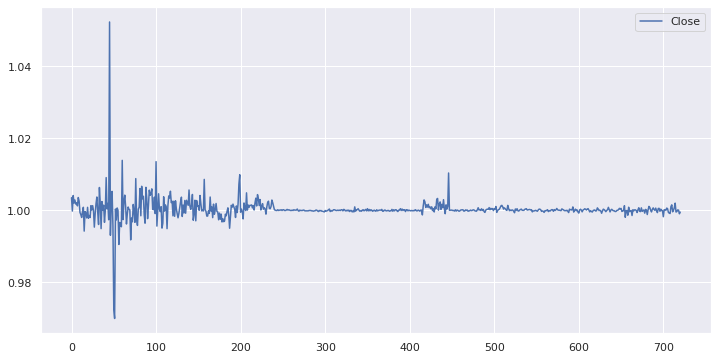

In [6]:
df[['Close']].plot(figsize=(12,6));


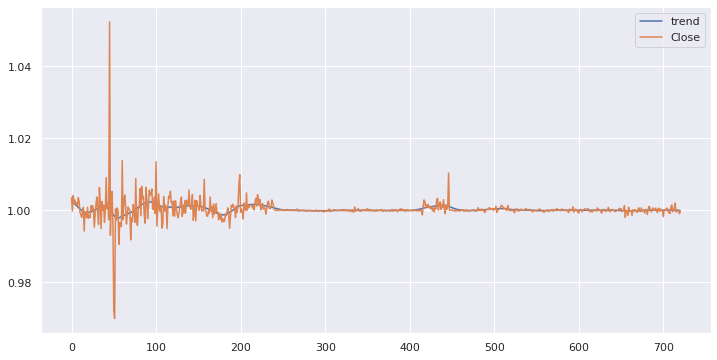

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [8]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-6.631432671133451,
 5.701920478984006e-09,
 15,
 705,
 {'1%': -3.4396596024765795,
  '5%': -2.86564834926679,
  '10%': -2.568957779286756},
 -6153.303547440123)

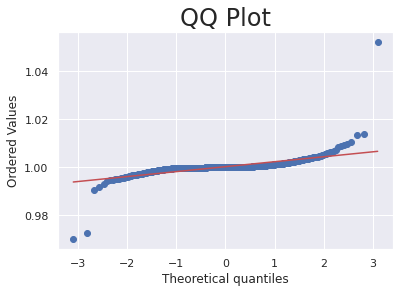

In [9]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [10]:
df['returns'] = df.Close.pct_change(1)*100

In [11]:
df['sq_returns'] = df.returns.mul(df.returns)


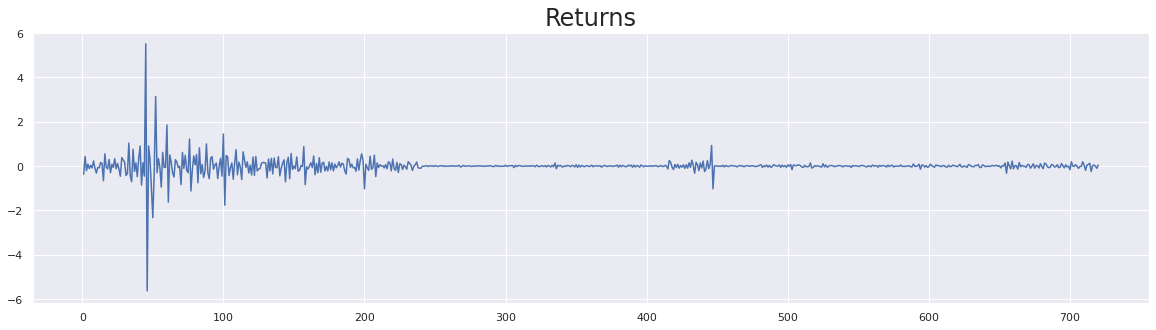

In [12]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


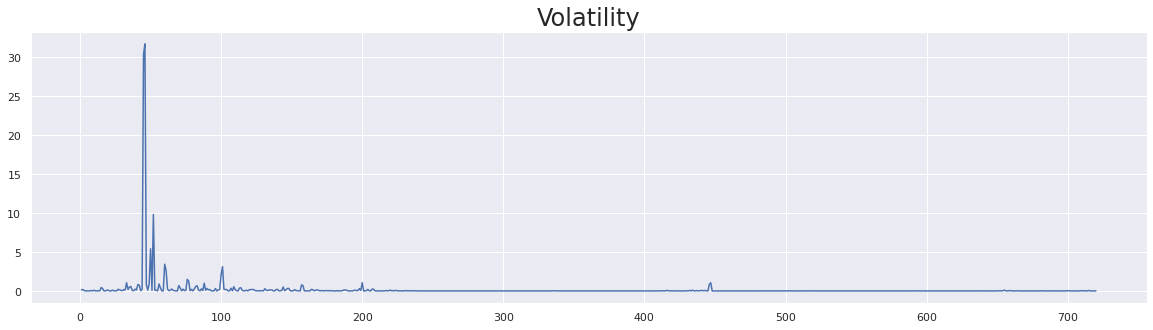

In [13]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

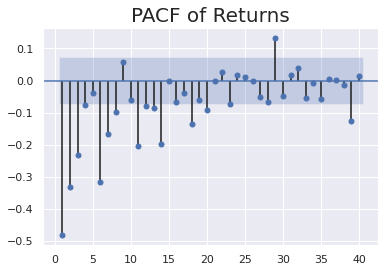

In [14]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

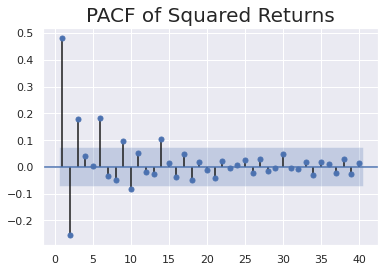

In [15]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [16]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 23.2 MB/s eta 0:00:00


In [17]:
from arch import arch_model


In [18]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [19]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 536112.2358077781
Iteration:      2,   Func. Count:     19,   Neg. LLF: 942.3374336874782
Iteration:      3,   Func. Count:     28,   Neg. LLF: -39.831504812603725
Iteration:      4,   Func. Count:     32,   Neg. LLF: -46.99364141613276
Iteration:      5,   Func. Count:     36,   Neg. LLF: -47.39778428471769
Iteration:      6,   Func. Count:     40,   Neg. LLF: -47.42153189596439
Iteration:      7,   Func. Count:     44,   Neg. LLF: -47.4217461647678
Iteration:      8,   Func. Count:     47,   Neg. LLF: -47.42174419409366
Optimization terminated successfully    (Exit mode 0)
            Current function value: -47.4217461647678
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                47.4217
Distribution:                  Normal   AIC:                          -88.8435
Method:            Maximum Likelihood   BIC:                          -75.1057
                                        No. Observations:                  720
Date:                Thu, Jan 26 2023   Df Residuals:                      719
Time:                        02:34:41   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0196  1.219e-02      1.609      0.108 [-4.272e-03,4.351e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0188  1.006e-02      1.869  6.166e-02 [-9.177e-04,3.850e-02]
alpha[1]       1.0000      0.367      2.722  6.489e-03      [  0.280,  1.720]
=============================================================================

Covariance estimator: robust
"""

In [20]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 2204.9159556512723
Iteration:     10,   Func. Count:     66,   Neg. LLF: -118.41370257968748
Iteration:     15,   Func. Count:     91,   Neg. LLF: -118.43352177440005
Optimization terminated successfully    (Exit mode 0)
            Current function value: -118.43352177440005
            Iterations: 15
            Function evaluations: 91
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                118.434
Distribution:                  Normal   AIC:                          -228.867
Method:            Maximum Likelihood   BIC:                          -210.550
                                        No. Observations:                  720
Date:                Thu, Jan 26 2023   Df Residuals:                      719
Time:                        02:34:41   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0180  1.006e-02      1.787  7.392e-02 [-1.740e-03,3.771e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0121  1.161e-02      1.041      0.298 [-1.066e-02,3.483e-02]
alpha[1]       0.7880      0.375      2.100  3.572e-02    [5.258e-02,  1.523]
alpha[2]       0.2120      0.146      1.454      0.146   [-7.384e-02,  0.498]
=============================================================================

Covariance estimator: robust
"""

In [21]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 259779.9522015731
Iteration:     10,   Func. Count:     88,   Neg. LLF: 2076.1145395677618
Iteration:     15,   Func. Count:    127,   Neg. LLF: 2901.6465010774837
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -415.78444746983064
            Iterations: 23
            Function evaluations: 158
            Gradient evaluations: 19


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                415.784
Distribution:                  Normal   AIC:                          -821.569
Method:            Maximum Likelihood   BIC:                          -798.673
                                        No. Observations:                  720
Date:                Thu, Jan 26 2023   Df Residuals:                      719
Time:                        02:34:41   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         5.3860e-03  2.306e-03      2.335  1.952e-02 [8.660e-04,9.906e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.7815e-03  6.009e-04      7.957  1.761e-15 [3.604e-03,5.959e-03]
alpha[1]       0.4131  7.850e-02      5.262  1.426e-07     [  0.259,  0.567]
alpha[2]       0.1749  5.477e-02      3.194  1.404e-03   [6.757e-02,  0.282]
alpha[3]       0.4908      0.130      3.767  1.654e-04     [  0.235,  0.746]
============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [22]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     85,   Neg. LLF: 608.5537996546159
Iteration:     10,   Func. Count:    180,   Neg. LLF: 181.058173584396
Iteration:     15,   Func. Count:    280,   Neg. LLF: 2101.1232376486323
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -594.1586446127969
            Iterations: 21


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


            Function evaluations: 321
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                594.159
Distribution:                  Normal   AIC:                          -1158.32
Method:            Maximum Likelihood   BIC:                          -1089.63
                                        No. Observations:                  720
Date:                Thu, Jan 26 2023   Df Residuals:                      719
Time:                        02:34:42   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -3.4377e-04  1.666e-03     -0.206      0.836 [-3.608e-03,2.921e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.2068e-04  7.674e-04      1.200      0.230 [-5.833e-04,2.425e-03]
alpha[1]       0.2717  6.286e-02      4.323  1.541e-05      [  0.149,  0.395]
alpha[2]       0.0541  5.326e-02      1.016      0.310   [-5.027e-02,  0.158]
alpha[3]       0.0766      0.105      0.732      0.464      [ -0.129,  0.282]
alpha[4]       0.0917  7.474e-02      1.227      0.220   [-5.478e-02,  0.238]
alpha[5]       0.0651      0.127      0.511      0.609      [ -0.184,  0.315]
alpha[6]       0.0477  5.057e-02      0.943      0.346   [-5.143e-02,  0.147]
alpha[7]   9.8290e-04  5.166e-02  1.903e-02      0.985      [ -0.100,  0.102]
alpha[8]       0.0607  3.452e-02      1.758  7.868e-02   [-6.956e-03,  0.128]
alpha[9]       0.0220  5.680e-02      0.387      0.699   [-8.934e-02,  0.133]
alpha[10]      0.0103  4.164e-02      0.246      0.805 [-7.135e-02,9.188e-02]
alpha[11]  9.8125e-04  4.801e-02  2.044e-02      0.984 [-9.311e-02,9.507e-02]
alpha[12]      0.3089      0.282      1.096      0.273      [ -0.243,  0.861]
alpha[13]  9.8097e-04  4.700e-03      0.209      0.835 [-8.230e-03,1.019e-02]
=============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [23]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [24]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: -522.2657026451473
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -522.2657004232329
            Iterations: 9
            Function evaluations: 38
            Gradient evaluations: 5


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                522.266
Distribution:                  Normal   AIC:                          -1036.53
Method:            Maximum Likelihood   BIC:                          -1018.21
                                        No. Observations:                  720
Date:                Thu, Jan 26 2023   Df Residuals:                      719
Time:                        02:34:42   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.4462e-04  1.314e-03      0.338      0.735 [-2.131e-03,3.020e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      8.5097e-04  1.760e-04      4.834  1.340e-06 [5.059e-04,1.196e-03]
alpha[1]       0.3883  6.049e-02      6.420  1.362e-10     [  0.270,  0.507]
beta[1]        0.6122  3.136e-02     19.525  6.748e-85     [  0.551,  0.674]
============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [25]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 1045.8438404918681
Iteration:     10,   Func. Count:     76,   Neg. LLF: -581.8320081155007
Iteration:     15,   Func. Count:    111,   Neg. LLF: -599.9639188946129
Iteration:     20,   Func. Count:    153,   Neg. LLF: 1620.3331692249
Iteration:     25,   Func. Count:    206,   Neg. LLF: -598.995959804003
Iteration:     30,   Func. Count:    275,   Neg. LLF: -598.4461776617256
Iteration:     35,   Func. Count:    349,   Neg. LLF: -599.6120132832873
Optimization terminated successfully    (Exit mode 0)
            Current function value: -599.9719281547794
            Iterations: 41
            Function evaluations: 380
            Gradient evaluations: 37


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                599.972
Distribution:                  Normal   AIC:                          -1189.94
Method:            Maximum Likelihood   BIC:                          -1167.05
                                        No. Observations:                  720
Date:                Thu, Jan 26 2023   Df Residuals:                      719
Time:                        02:34:42   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.9348e-04  1.432e-03      0.135      0.893 [-2.614e-03,3.001e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.4343e-04  6.534e-05      2.195  2.816e-02 [1.536e-05,2.715e-04]
alpha[1]       0.4060  6.122e-02      6.632  3.320e-11     [  0.286,  0.526]
beta[1]        0.2131  9.994e-02      2.133  3.294e-02   [1.727e-02,  0.409]
beta[2]        0.3808  8.865e-02      4.296  1.740e-05     [  0.207,  0.555]
============================================================================

Covariance estimator: robust
"""

In [26]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     47,   Neg. LLF: -393.12492392095703
Optimization terminated successfully    (Exit mode 0)
            Current function value: -393.1249291379603
            Iterations: 9
            Function evaluations: 47
            Gradient evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                393.125
Distribution:                  Normal   AIC:                          -774.250
Method:            Maximum Likelihood   BIC:                          -746.774
                                        No. Observations:                  720
Date:                Thu, Jan 26 2023   Df Residuals:                      719
Time:                        02:34:42   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.2612e-04  1.650e-03      0.258      0.796 [-2.808e-03,3.660e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.8058e-03  8.394e-04      3.343  8.296e-04 [1.161e-03,4.451e-03]
alpha[1]       0.3520  9.372e-02      3.756  1.727e-04     [  0.168,  0.536]
beta[1]        0.2106      1.080      0.195      0.845     [ -1.906,  2.327]
beta[2]        0.2106      0.186      1.134      0.257     [ -0.153,  0.575]
beta[3]        0.2106      1.022      0.206      0.837     [ -1.792,  2.213]
============================================================================

Covariance estimator: robust
"""

In [27]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: -343.3712142253944
            Iterations: 8
            Function evaluations: 33
            Gradient evaluations: 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                343.371
Distribution:                  Normal   AIC:                          -676.742
Method:            Maximum Likelihood   BIC:                          -653.846
                                        No. Observations:                  720
Date:                Thu, Jan 26 2023   Df Residuals:                      719
Time:                        02:34:42   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.8143e-04  1.676e-03      0.168      0.867 [-3.003e-03,3.566e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.1205e-03  1.620e-04     19.267  1.016e-82 [2.803e-03,3.438e-03]
alpha[1]       0.1908  4.636e-02      4.115  3.866e-05   [9.993e-02,  0.282]
alpha[2]       0.0899  9.157e-02      0.982      0.326  [-8.957e-02,  0.269]
beta[1]        0.7013  1.789e-02     39.193      0.000     [  0.666,  0.736]
============================================================================

Covariance estimator: robust
"""

In [28]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: -346.58684615053886
            Iterations: 8
            Function evaluations: 38
            Gradient evaluations: 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                346.587
Distribution:                  Normal   AIC:                          -681.174
Method:            Maximum Likelihood   BIC:                          -653.698
                                        No. Observations:                  720
Date:                Thu, Jan 26 2023   Df Residuals:                      719
Time:                        02:34:42   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.1100e-04  1.647e-03  6.740e-02      0.946 [-3.117e-03,3.339e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.1169e-03  1.612e-04     19.333  2.814e-83 [2.801e-03,3.433e-03]
alpha[1]       0.1605  4.077e-02      3.936  8.290e-05   [8.057e-02,  0.240]
alpha[2]       0.0600      0.196      0.306      0.759     [ -0.324,  0.444]
alpha[3]       0.0600      0.206      0.292      0.770     [ -0.343,  0.463]
beta[1]        0.7016  2.607e-02     26.911 1.619e-159     [  0.650,  0.753]
============================================================================

Covariance estimator: robust
"""

In [29]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [30]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     52,   Neg. LLF: -437.6082261698983
Iteration:     10,   Func. Count:     88,   Neg. LLF: -612.2391072633635
Iteration:     15,   Func. Count:    119,   Neg. LLF: -618.0342030631059
Optimization terminated successfully    (Exit mode 0)
            Current function value: -618.034462488695
            Iterations: 19
            Function evaluations: 142
            Gradient evaluations: 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                618.034
Distribution:                  Normal   AIC:                          -1226.07
Method:            Maximum Likelihood   BIC:                          -1203.17
                                        No. Observations:                  720
Date:                Thu, Jan 26 2023   Df Residuals:                      719
Time:                        02:34:42   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -9.9871e-04  1.174e-03     -0.851      0.395 [-3.300e-03,1.302e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0211  7.528e-02      0.280      0.779      [ -0.126,  0.169]
alpha[1]       0.6526  8.649e-02      7.545  4.529e-14      [  0.483,  0.822]
gamma[1]      -0.0167  4.068e-02     -0.409      0.682 [-9.638e-02,6.308e-02]
beta[1]        0.9912  1.160e-02     85.470      0.000      [  0.968,  1.014]
=============================================================================

Covariance estimator: robust
"""

In [31]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [32]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                393.723
Distribution:                  Normal   AIC:                          -777.447
Method:            Maximum Likelihood   BIC:                          -754.550
                                        No. Observations:                  720
Date:                Thu, Jan 26 2023   Df Residuals:                      719
Time:                        02:34:42   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -2.8538e-03  2.738e-03     -1.042      0.297 [-8.220e-03,2.512e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.8059e-03  1.905e-04     14.730  4.144e-49 [2.433e-03,3.179e-03]
alpha[1]       0.2547  6.084e-02      4.187  2.829e-05     [  0.135,  0.374]
gamma[1]       0.2674      0.258      1.036      0.300     [ -0.239,  0.773]
beta[1]        0.5955  3.371e-02     17.663  8.026e-70     [  0.529,  0.662]
============================================================================

Covariance estimator: robust
"""

In [33]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [34]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: -413.38587449998414
Iteration:     10,   Func. Count:     79,   Neg. LLF: -568.1117849360846
Iteration:     15,   Func. Count:    114,   Neg. LLF: 613957.3328898067
Iteration:     20,   Func. Count:    166,   Neg. LLF: -568.2129439756486
Iteration:     25,   Func. Count:    225,   Neg. LLF: 936528.7248620912
Iteration:     30,   Func. Count:    278,   Neg. LLF: -568.2111496467459
Optimization terminated successfully    (Exit mode 0)
            Current function value: -568.2111117934626
            Iterations: 38
            Function evaluations: 322
            Gradient evaluations: 34


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:                568.211
Distribution:                  Normal   AIC:                          -1126.42
Method:            Maximum Likelihood   BIC:                          -1103.53
                                        No. Observations:                  720
Date:                Thu, Jan 26 2023   Df Residuals:                      719
Time:                        02:34:42   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -3.6791e-06  2.984e-05     -0.123      0.902 [-6.216e-05,5.480e-05]
                               Volatility Model                               
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
omega       3.3802e-03  1.880e-03      1.798  7.217e-02 [-3.044e-04,7.065e-03]
alpha[1]        0.2379  4.034e-02      5.899  3.667e-09      [  0.159,  0.317]
gamma[1]   -6.5550e-03  7.424e-02 -8.829e-02      0.930      [ -0.152,  0.139]
beta[1]         0.7654  5.679e-02     13.478  2.109e-41      [  0.654,  0.877]
==============================================================================

Covariance estimator: robust
"""

In [35]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [36]:
from arch.univariate import FIGARCH

In [37]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: -544.5705475734753
Iteration:     10,   Func. Count:     81,   Neg. LLF: 29674.028952303517
Iteration:     15,   Func. Count:    136,   Neg. LLF: -594.5261070110132
Optimization terminated successfully    (Exit mode 0)
            Current function value: -594.5261069316018
            Iterations: 19
            Function evaluations: 136
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:                594.526
Distribution:                  Normal   AIC:                          -1179.05
Method:            Maximum Likelihood   BIC:                          -1156.16
                                        No. Observations:                  720
Date:                Thu, Jan 26 2023   Df Residuals:                      719
Time:                        02:34:43   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -2.1826e-05  1.486e-03 -1.469e-02      0.988 [-2.934e-03,2.891e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.3789e-04  7.343e-05      1.878  6.040e-02 [-6.031e-06,2.818e-04]
phi        8.7063e-08  8.242e-02  1.056e-06      1.000      [ -0.162,  0.162]
d              1.0000      0.103      9.713  2.652e-22      [  0.798,  1.202]
beta           0.6866      0.131      5.237  1.634e-07      [  0.430,  0.944]
=============================================================================

Covariance estimator: robust
"""

In [38]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [39]:
from arch.univariate import HARCH

In [40]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: -47.39778474495756
Optimization terminated successfully    (Exit mode 0)
            Current function value: -47.42174618701284
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:                47.4217
Distribution:                  Normal   AIC:                          -88.8435
Method:            Maximum Likelihood   BIC:                          -75.1057
                                        No. Observations:                  720
Date:                Thu, Jan 26 2023   Df Residuals:                      719
Time:                        02:34:43   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0196  1.219e-02      1.609      0.108 [-4.272e-03,4.351e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0188  1.006e-02      1.869  6.166e-02 [-9.177e-04,3.850e-02]
alpha[1]       1.0000      0.367      2.722  6.489e-03      [  0.280,  1.720]
=============================================================================

Covariance estimator: robust
"""

In [41]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [42]:
from arch.univariate import APARCH


In [43]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     50,   Neg. LLF: 794.3576357147751
Iteration:     10,   Func. Count:     90,   Neg. LLF: -429.29998885902535
Iteration:     15,   Func. Count:    137,   Neg. LLF: 19554482.430837408
Iteration:     20,   Func. Count:    184,   Neg. LLF: -48.244581198410856
Iteration:     25,   Func. Count:    231,   Neg. LLF: 484.02103734036905
Iteration:     30,   Func. Count:    278,   Neg. LLF: 3046.869947055315
Iteration:     35,   Func. Count:    323,   Neg. LLF: -591.2993334595076
Iteration:     40,   Func. Count:    363,   Neg. LLF: -547.9982830433155
Iteration:     45,   Func. Count:    403,   Neg. LLF: -566.7582826543226
Iteration:     50,   Func. Count:    443,   Neg. LLF: -571.6216036581213
Iteration:     55,   Func. Count:    483,   Neg. LLF: -586.3438362351438
Iteration:     60,   Func. Count:    523,   Neg. LLF: -595.4302697238616
Iteration:     65,   Func. Count:    562,   Neg. LLF: -600.2302788334835
Iteration:     70,   Func. Count:    598,   Neg. LL

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:                600.260
Distribution:                  Normal   AIC:                          -1188.52
Method:            Maximum Likelihood   BIC:                          -1161.04
                                        No. Observations:                  720
Date:                Thu, Jan 26 2023   Df Residuals:                      719
Time:                        02:34:43   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         2.1448e-04        nan        nan        nan [    nan,    nan]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega      4.2238e-06        nan        nan        nan [    nan,    nan]
alpha[1]       0.3782        nan        nan        nan [    nan,    nan]
gamma[1]      -0.0502        nan        nan        nan [    nan,    nan]
beta[1]        0.6218        nan        nan        nan [    nan,    nan]
delta          2.9045        nan        nan        nan [    nan,    nan]
========================================================================

Covariance estimator: robust
"""

In [44]:
from scipy import stats


In [45]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=499795.1447131129, pvalue=0.0)

In [46]:
jarque_bera_test.statistic

499795.1447131129

In [47]:
jarque_bera_test.pvalue

0.0

jarquer-bera para los retornos

In [48]:
returns = df.returns[1:]
returns

1     -0.369290
2      0.430469
3     -0.208536
4      0.085026
5     -0.110878
         ...   
716    0.011405
717    0.046815
718   -0.005799
719   -0.101490
720    0.045342
Name: returns, Length: 720, dtype: float64

In [49]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=267073.30709345336, pvalue=0.0)

In [50]:
jarque_bera_test.statistic

267073.30709345336

In [51]:
jarque_bera_test.pvalue

0.0

curtosis

In [52]:
returns.kurt()

95.01933544596896

coef. asimetria

In [53]:
returns.skew()

0.12357871256046232

In [54]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic               -118.955
P-value                         0.000
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [55]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -0.271
P-value                         0.593
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -2.60 (1%), -1.97 (5%), -1.65 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [56]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -11.745
P-value                         0.000
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [57]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.020
P-value                         0.995
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        721 non-null    object 
 1   Open        721 non-null    float64
 2   High        721 non-null    float64
 3   Low         721 non-null    float64
 4   Close       721 non-null    float64
 5   Adj Close   721 non-null    float64
 6   Volume      721 non-null    int64  
 7   trend       721 non-null    float64
 8   returns     720 non-null    float64
 9   sq_returns  720 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 56.5+ KB


In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [62]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [63]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [64]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [65]:
data = pd.read_csv("/content/BUSD-USD.csv")

In [66]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,1.001907,1.007693,0.995165,1.003546,1.003546,19779988
1,2020-01-28,1.003707,1.008858,0.992948,0.999840,0.999840,25015028
2,2020-01-29,0.999605,1.006759,0.994935,1.004144,1.004144,20810480
3,2020-01-30,1.004207,1.012232,0.999152,1.002050,1.002050,20571220
4,2020-01-31,1.002327,1.006600,0.999915,1.002902,1.002902,19372175
...,...,...,...,...,...,...,...
716,2022-01-12,0.999593,1.001474,0.998209,0.999687,0.999687,4543435607
717,2022-01-13,0.999701,1.001527,0.998226,1.000155,1.000155,4713084695
718,2022-01-14,1.000218,1.001682,0.998064,1.000097,1.000097,4371361697
719,2022-01-15,1.000154,1.001535,0.998566,0.999082,0.999082,2928423910


In [67]:
data = data[["Date","Close","Volume"]]


In [68]:
data

,Date,Close,Volume
0,2020-01-27,1.003546,19779988
1,2020-01-28,0.999840,25015028
2,2020-01-29,1.004144,20810480
3,2020-01-30,1.002050,20571220
4,2020-01-31,1.002902,19372175
...,...,...,...
716,2022-01-12,0.999687,4543435607
717,2022-01-13,1.000155,4713084695
718,2022-01-14,1.000097,4371361697
719,2022-01-15,0.999082,2928423910


In [69]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,1.003546,19779988,0.999840
1,2020-01-28,0.999840,25015028,1.004144
2,2020-01-29,1.004144,20810480,1.002050
3,2020-01-30,1.002050,20571220,1.002902
4,2020-01-31,1.002902,19372175,1.001790
...,...,...,...,...
716,2022-01-12,0.999687,4543435607,1.000155
717,2022-01-13,1.000155,4713084695,1.000097
718,2022-01-14,1.000097,4371361697,0.999082
719,2022-01-15,0.999082,2928423910,0.999535


In [70]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,1.003546,19779988,0.999840
1,2020-01-28,0.999840,25015028,1.004144
2,2020-01-29,1.004144,20810480,1.002050
3,2020-01-30,1.002050,20571220,1.002902
4,2020-01-31,1.002902,19372175,1.001790
...,...,...,...,...
715,2022-01-11,0.999573,4389687683,0.999687
716,2022-01-12,0.999687,4543435607,1.000155
717,2022-01-13,1.000155,4713084695,1.000097
718,2022-01-14,1.000097,4371361697,0.999082


In [71]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [72]:
price_volume_target_scaled_df

array([[4.07285974e-01, 1.73104587e-05, 3.62282939e-01],
       [3.62282939e-01, 2.39522462e-04, 4.14547662e-01],
       [4.14547662e-01, 6.10518039e-05, 3.89119611e-01],
       ...,
       [3.66108075e-01, 1.99234249e-01, 3.65403764e-01],
       [3.65403764e-01, 1.84729116e-01, 3.53078324e-01],
       [3.53078324e-01, 1.23480664e-01, 3.58579235e-01]])

In [73]:
price_volume_target_scaled_df.shape

(720, 3)

In [74]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [75]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((720, 2), (720, 1))

In [76]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [77]:
X_train.shape, y_train.shape

((468, 2), (468, 1))

In [78]:
X_test.shape, y_test.shape

((252, 2), (252, 1))

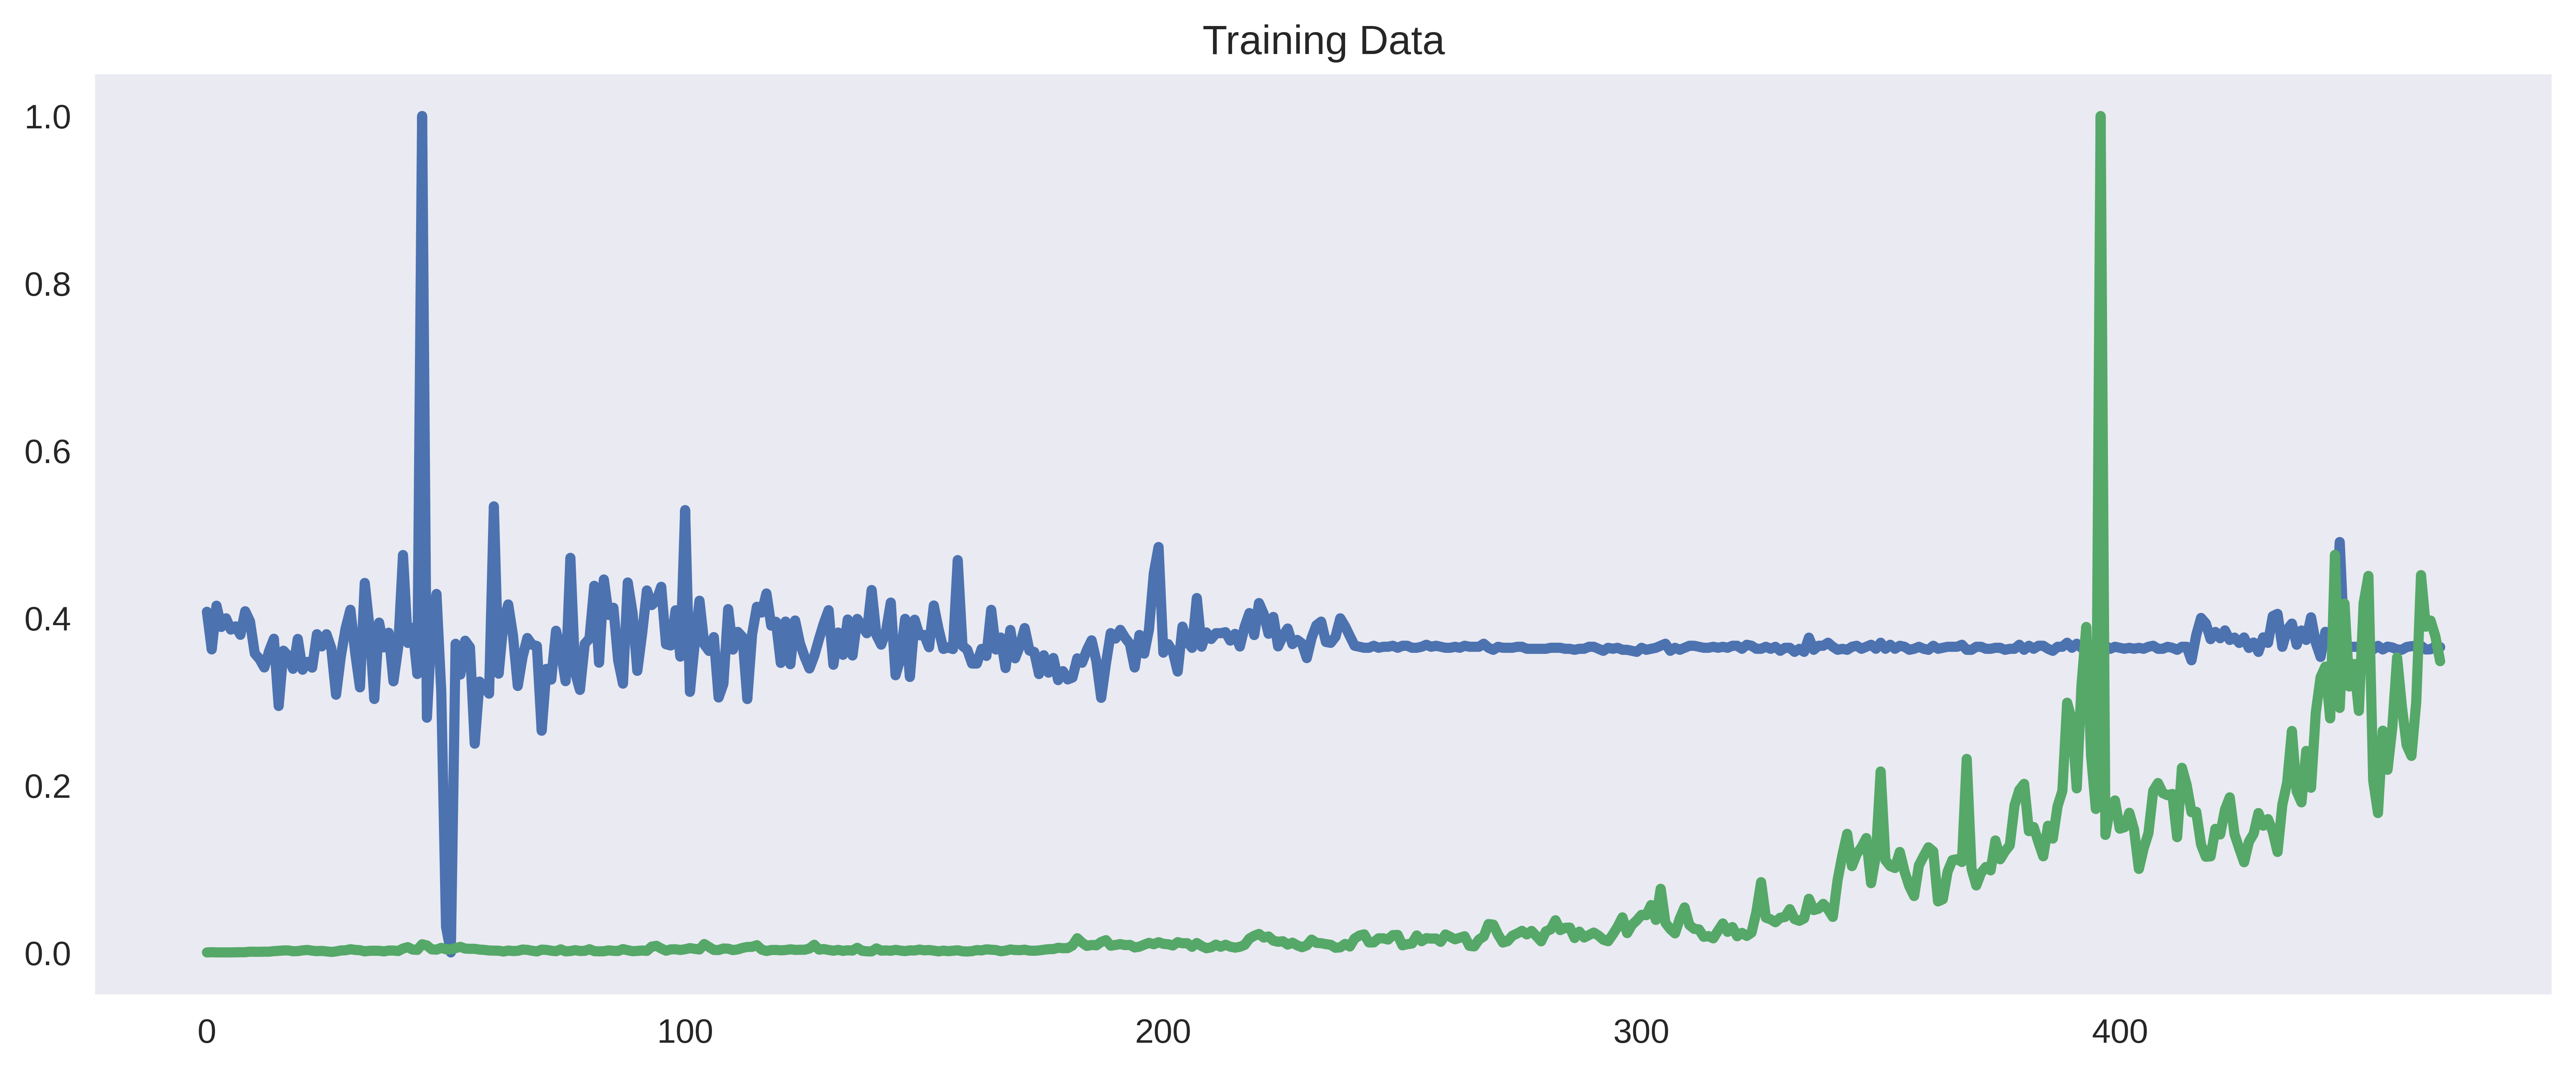

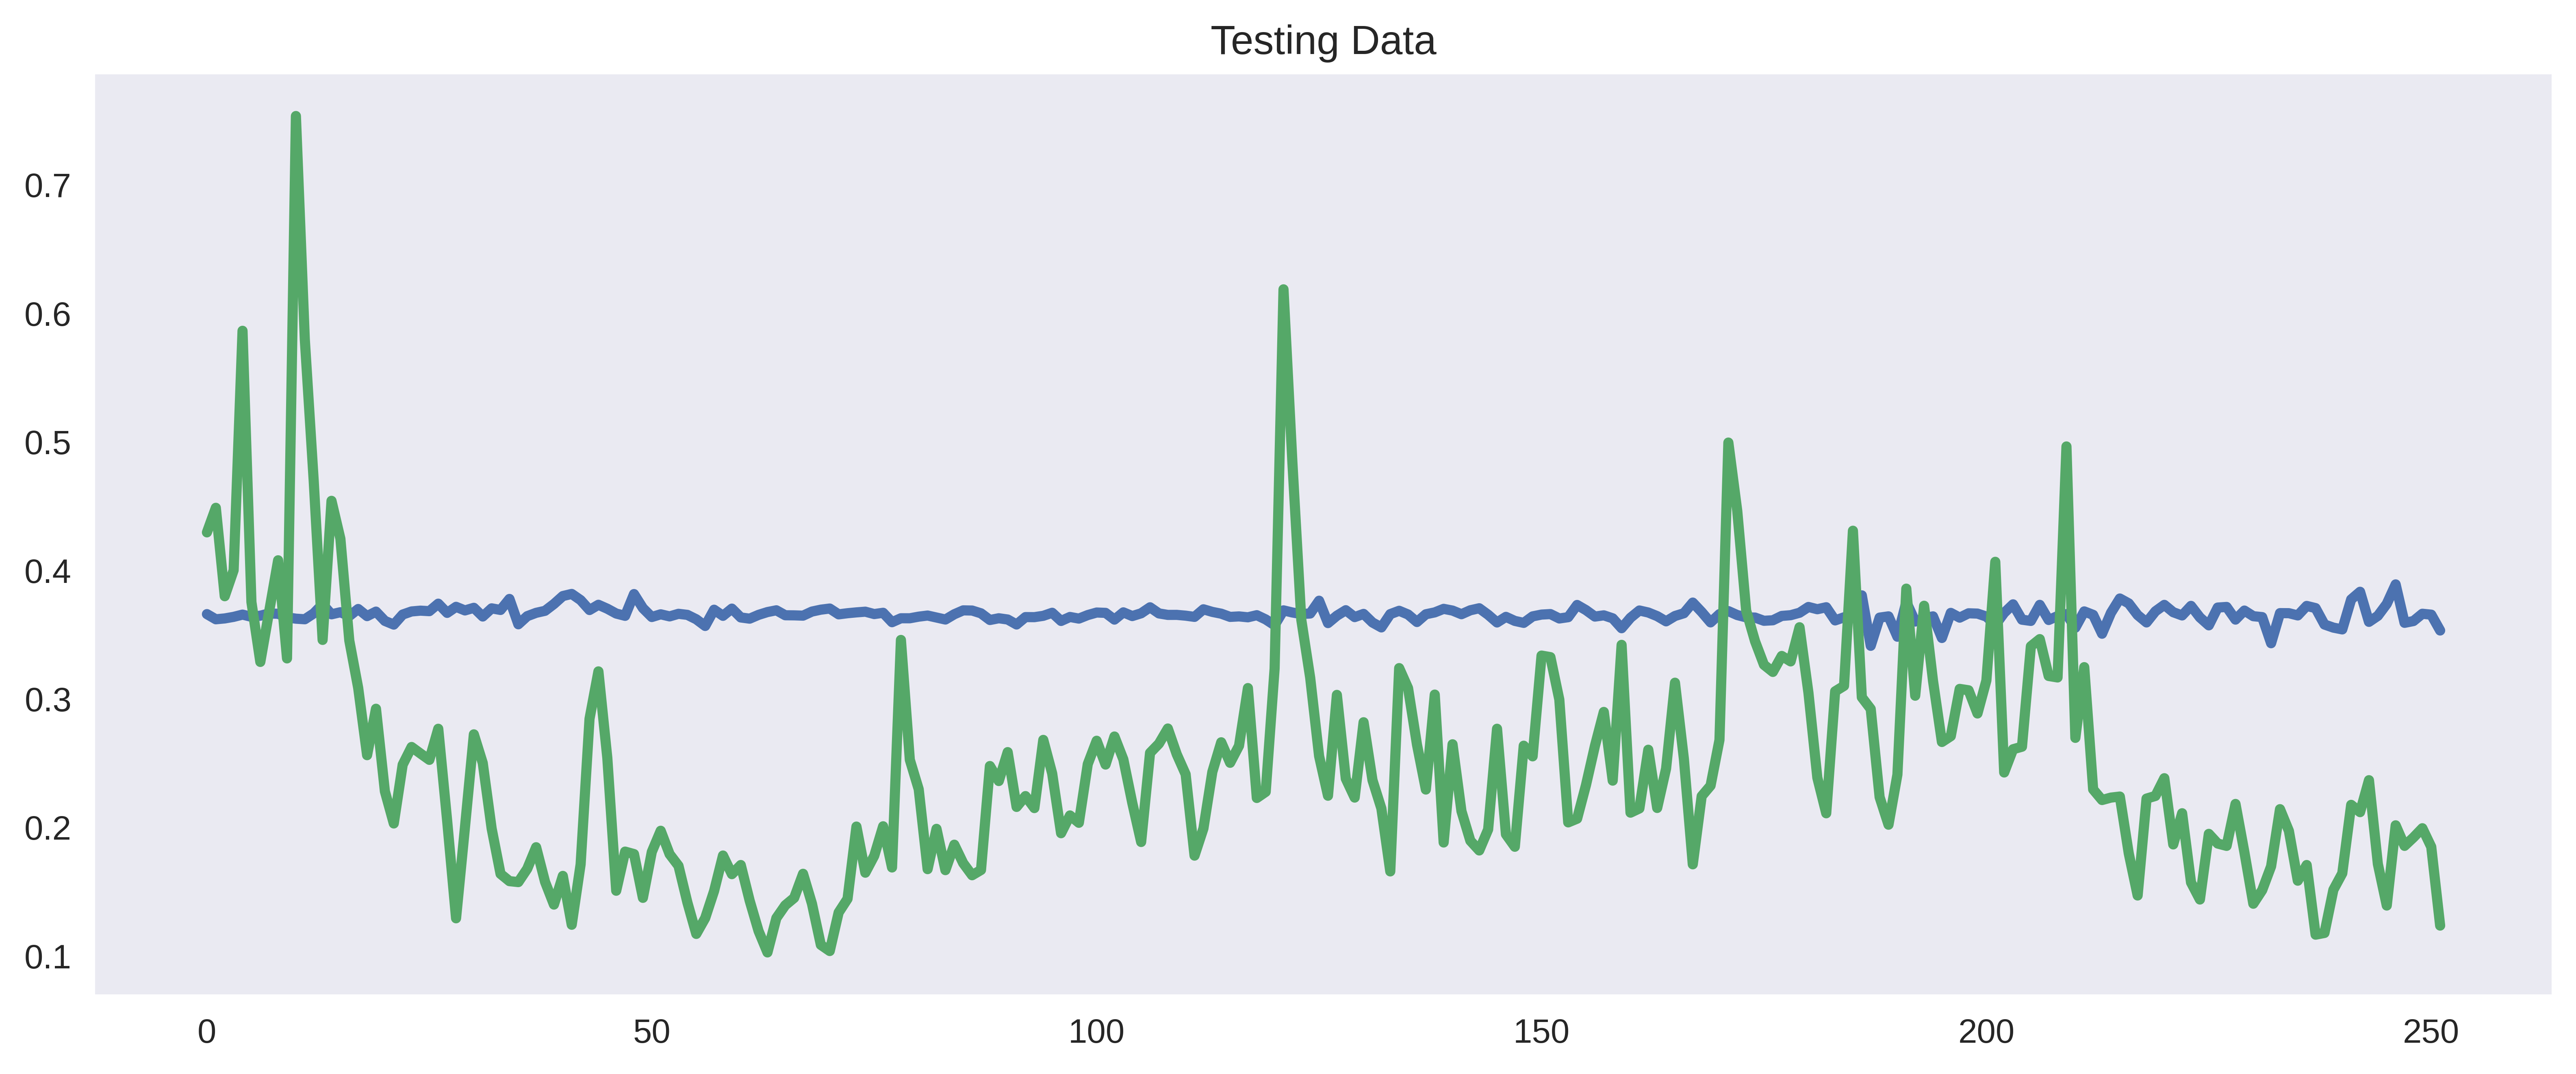

In [79]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [80]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [81]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  -0.46798795005212


In [82]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.37099646],
       [0.36908502],
       [0.37130495],
       [0.37022483],
       [0.37066426],
       [0.37009069],
       [0.37025536],
       [0.36982622],
       [0.37102347],
       [0.37051075],
       [0.36888065],
       [0.36859334],
       [0.36816738],
       [0.36899886],
       [0.36962713],
       [0.3662127 ],
       [0.36902166],
       [0.36875914],
       [0.36810073],
       [0.36961893],
       [0.36805513],
       [0.36845424],
       [0.36816056],
       [0.36985821],
       [0.36923947],
       [0.36985693],
       [0.36915132],
       [0.36678368],
       [0.36873435],
       [0.37015766],
       [0.37110262],
       [0.36891541],
       [0.36715877],
       [0.37246081],
       [0.37018915],
       [0.36656872],
       [0.37044758],
       [0.3691869 ],
       [0.3699346 ],
       [0.36746537],
       [0.36920733],
       [0.37388142],
       [0.3694204 ],
       [0.37018822],
       [0.36783839],
       [0.396181  ],
       [0.36562192],
       [0.370

In [83]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [84]:
len(Predicted)

720

In [85]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [86]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-01-27
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
...,...
715,2022-01-11
716,2022-01-12
717,2022-01-13
718,2022-01-14


In [87]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-01-27,0.407286
1,2020-01-28,0.362283
2,2020-01-29,0.414548
3,2020-01-30,0.389120
4,2020-01-31,0.399466
...,...,...
715,2022-01-11,0.359041
716,2022-01-12,0.360425
717,2022-01-13,0.366108
718,2022-01-14,0.365404


In [88]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-01-27,0.407286,0.370996
1,2020-01-28,0.362283,0.369085
2,2020-01-29,0.414548,0.371305
3,2020-01-30,0.389120,0.370225
4,2020-01-31,0.399466,0.370664
...,...,...,...
715,2022-01-11,0.359041,0.369091
716,2022-01-12,0.360425,0.369155
717,2022-01-13,0.366108,0.369402
718,2022-01-14,0.365404,0.369361


In [89]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [90]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [91]:
data

,Date,Close,Volume,Target
0,2020-01-27,1.003546,19779988,0.999840
1,2020-01-28,0.999840,25015028,1.004144
2,2020-01-29,1.004144,20810480,1.002050
3,2020-01-30,1.002050,20571220,1.002902
4,2020-01-31,1.002902,19372175,1.001790
...,...,...,...,...
716,2022-01-12,0.999687,4543435607,1.000155
717,2022-01-13,1.000155,4713084695,1.000097
718,2022-01-14,1.000097,4371361697,0.999082
719,2022-01-15,0.999082,2928423910,0.999535


In [92]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-27,1.003546,19779988,0.999840
1,2020-01-28,0.999840,25015028,1.004144
2,2020-01-29,1.004144,20810480,1.002050
3,2020-01-30,1.002050,20571220,1.002902
4,2020-01-31,1.002902,19372175,1.001790
...,...,...,...,...
716,2022-01-12,0.999687,4543435607,1.000155
717,2022-01-13,1.000155,4713084695,1.000097
718,2022-01-14,1.000097,4371361697,0.999082
719,2022-01-15,0.999082,2928423910,0.999535


In [93]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[1.00354600e+00, 1.97799880e+07],
       [9.99840000e-01, 2.50150280e+07],
       [1.00414400e+00, 2.08104800e+07],
       ...,
       [1.00009700e+00, 4.37136170e+09],
       [9.99082000e-01, 2.92842391e+09],
       [9.99535000e-01, 3.17206330e+09]])

In [94]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [95]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [96]:
X

[array([0.40728597]),
 array([0.36228294]),
 array([0.41454766]),
 array([0.38911961]),
 array([0.3994657]),
 array([0.38596236]),
 array([0.38983607]),
 array([0.37973285]),
 array([0.40791743]),
 array([0.39583485]),
 array([0.35746205]),
 array([0.35069824]),
 array([0.34066788]),
 array([0.36024287]),
 array([0.37502125]),
 array([0.29463267]),
 array([0.36075288]),
 array([0.35457195]),
 array([0.33908925]),
 array([0.37482696]),
 array([0.33799636]),
 array([0.34738312]),
 array([0.34048573]),
 array([0.38046145]),
 array([0.3658895]),
 array([0.38043716]),
 array([0.36383728]),
 array([0.30808743]),
 array([0.35398907]),
 array([0.38749241]),
 array([0.40971463]),
 array([0.35823922]),
 array([0.31689132]),
 array([0.44173649]),
 array([0.38824529]),
 array([0.30301154]),
 array([0.39432908]),
 array([0.36466302]),
 array([0.38224651]),
 array([0.32411658]),
 array([0.36513661]),
 array([0.4751184]),
 array([0.37006679]),
 array([0.38819672]),
 array([0.33288403]),
 array([1.]),

In [97]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [98]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [99]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((503, 1, 1), (217, 1, 1))

In [100]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [101]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
13/13 [==============================] - 8s 91ms/step - loss: 0.1078 - val_loss: 0.0580
Epoch 2/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0215 - val_loss: 0.0099
Epoch 3/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0076 - val_loss: 0.0018
Epoch 4/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0043 - val_loss: 2.4372e-04
Epoch 5/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0030 - val_loss: 2.4379e-04
Epoch 6/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0028 - val_loss: 3.6888e-04
Epoch 7/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0027 - val_loss: 2.5776e-04
Epoch 8/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0028 - val_loss: 2.5565e-04
Epoch 9/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0028 - val_loss: 2.4284e-04
Epoch 10/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0028 - val_

In [102]:
# Make prediction
predicted = model.predict(X)

23/23 [==============================] - 1s 3ms/step


In [103]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [104]:
test_predicted

[0.37414852,
 0.3668289,
 0.3753282,
 0.37119552,
 0.37287757,
 0.37068206,
 0.37131208,
 0.36966875,
 0.37425113,
 0.37228742,
 0.36604398,
 0.3649424,
 0.36330822,
 0.36649677,
 0.36890218,
 0.35579926,
 0.36657977,
 0.36557332,
 0.36305097,
 0.3688706,
 0.36287284,
 0.36440235,
 0.36327854,
 0.3697873,
 0.36741602,
 0.36978337,
 0.36708197,
 0.35799545,
 0.36547834,
 0.37093088,
 0.37454307,
 0.3661705,
 0.35943174,
 0.37974206,
 0.37105334,
 0.35716704,
 0.37204257,
 0.36721638,
 0.3700777,
 0.36061013,
 0.3672935,
 0.38515374,
 0.36809596,
 0.37104547,
 0.36203957,
 0.4690778,
 0.35350865,
 0.37133577,
 0.37760776,
 0.35860968,
 0.31249347,
 0.30741817,
 0.367924,
 0.36193863,
 0.36851883,
 0.36723617,
 0.3484389,
 0.36056063,
 0.3594892,
 0.35820737,
 0.39456764,
 0.36211085,
 0.37199715,
 0.37557286,
 0.3695285,
 0.35971102,
 0.36536562,
 0.36904642,
 0.3677283,
 0.3674892,
 0.35096857,
 0.36303517,
 0.36094677,
 0.37046286,
 0.36654422,
 0.3606438,
 0.3846108,
 0.3622692,
 0.35

In [105]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
5,2020-02-01
...,...
716,2022-01-12
717,2022-01-13
718,2022-01-14
719,2022-01-15


In [106]:
df_predicted['predictions'] = test_predicted

In [107]:
df_predicted

,Date,predictions
1,2020-01-28,0.374149
2,2020-01-29,0.366829
3,2020-01-30,0.375328
4,2020-01-31,0.371196
5,2020-02-01,0.372878
...,...,...
716,2022-01-12,0.366301
717,2022-01-13,0.366526
718,2022-01-14,0.367452
719,2022-01-15,0.367337


In [108]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [109]:
df_predicted['Close'] = close[1:]

In [110]:
df_predicted

,Date,predictions,Close
1,2020-01-28,0.374149,0.362283
2,2020-01-29,0.366829,0.414548
3,2020-01-30,0.375328,0.389120
4,2020-01-31,0.371196,0.399466
5,2020-02-01,0.372878,0.385962
...,...,...,...
716,2022-01-12,0.366301,0.360425
717,2022-01-13,0.366526,0.366108
718,2022-01-14,0.367452,0.365404
719,2022-01-15,0.367337,0.353078


In [111]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")